In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv("datasets_596958_1073629_Placement_Data_Full_Class.csv")

In [ ]:
data.tail(10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


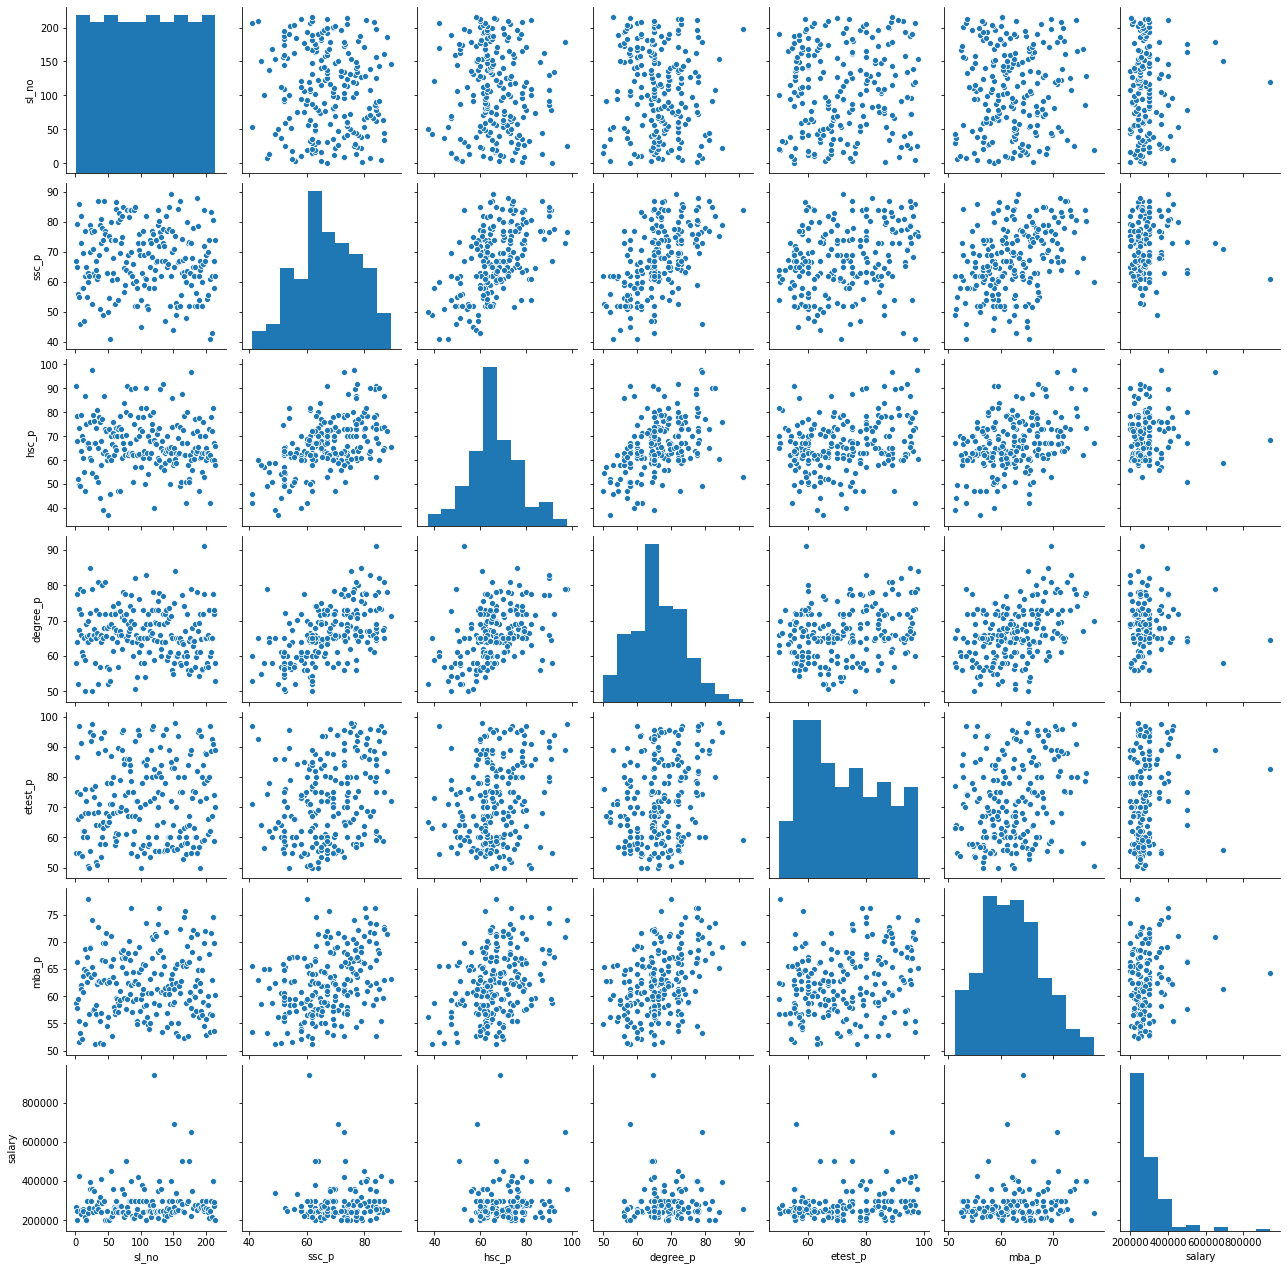

In [7]:
sns.pairplot(data)

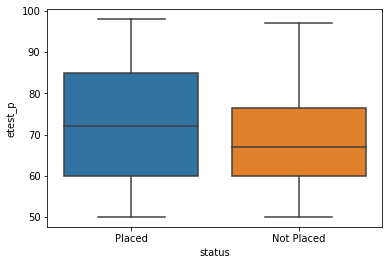

In [8]:
ax = sns.boxplot(x="status", y="etest_p", data=data)

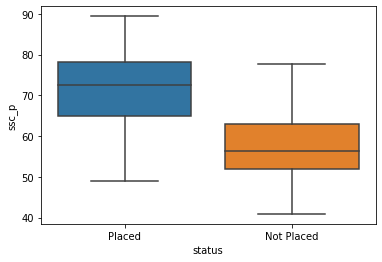

In [9]:
bx= sns.boxplot(x="status", y="ssc_p", data=data)

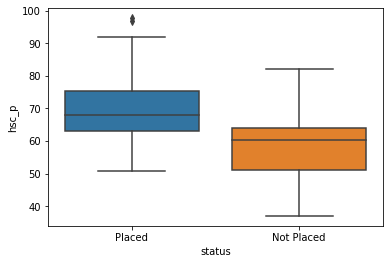

In [10]:
cx= sns.boxplot(x="status", y="hsc_p", data=data)

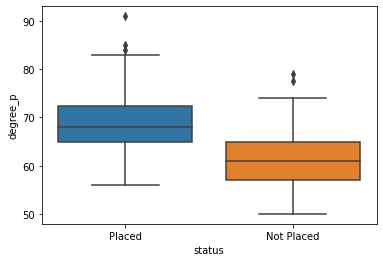

In [11]:
dx= sns.boxplot(x="status", y="degree_p", data=data)

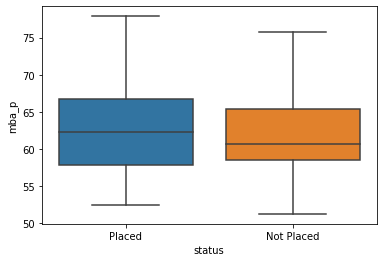

In [12]:
ex= sns.boxplot(x="status", y="mba_p", data=data)

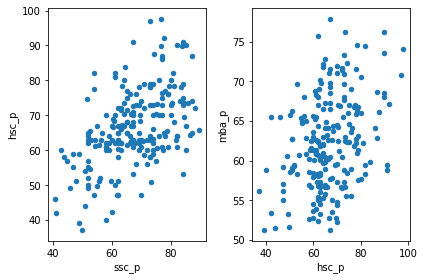

In [16]:
fig, axes = plt.subplots(ncols=2)
data.plot.scatter(x="ssc_p", y="hsc_p", ax=axes[0])
data.plot.scatter(x="hsc_p", y="mba_p", ax=axes[1])
fig.tight_layout();

In [13]:
Q1 = data['degree_p'].quantile(0.25)
Q3 = data['degree_p'].quantile(0.75)
IQR = Q3 - Q1 

In [23]:
Upper_Whisker = Q3+1.5*IQR

In [25]:
data= data[data['degree_p']<Upper_Whisker]

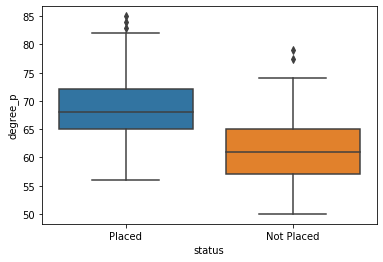

In [26]:
sns.boxplot(x="status", y="degree_p", data=data)

In [14]:
filter = (data['degree_p'] >= Q1 - 1.5 * IQR) & (data['degree_p'] <= Q3 + 1.5 *IQR)
data.loc[filter]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["gender"])
data["gender"]= le.transform(data["gender"])

In [16]:
le.fit(data['workex'])
data['workex']= le.transform(data['workex'])

In [17]:
le.fit(data['ssc_b'])
data['ssc_b']=le.transform(data['ssc_b'])

In [18]:
le.fit(data['hsc_b'])
data['hsc_b']=le.transform(data['hsc_b'])

In [19]:
le.fit(data['degree_t'])
data['degree_t']=le.transform(data['degree_t'])


In [20]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [21]:
le.fit(data['specialisation'])
data['specialisation']=le.transform(data['specialisation'])

In [27]:
data = pd.get_dummies(data, columns=['hsc_s'])

In [34]:
X = data.drop(["status", "sl_no", 'salary'], axis=1)
y = data['status']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [104]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [105]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred =clf.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8769230769230769


In [108]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))

confusion_matrix:
 [[11  5]
 [ 3 46]]


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, random_state=107)
rf.fit(X_train, y_train)
y_pred1=rf.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred1))

confusion_matrix:
 [[ 9  7]
 [ 0 49]]


In [111]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.8923076923076924
